In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('archive/contract-records.csv')
df.head ()

# Configure LLM To Use WIth python

In [ ]:
from openai import OpenAI

client = OpenAI(
  api_key="add your openAI API",
 )


In [ ]:
completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "Eres un mentor de habilidades blandas que provee herramientas practicas para la vida diaria."},
    {"role": "user", "content": "No sé cómo mejorar mi comunicación con mi jefe. ¿Qué puedo hacer?"}
  ]
)

print(completion.choices[0].message)

### Configure OpeanAi & Llama-2 LLMs

In [ ]:
import ollama


In [ ]:
"""response = ollama.chat(model='llama3', messages=[
  {
    'role': 'user',
    'content': 'Why is the sky blue?',
  },
])
print(response['message']['content'])
"""

## Task 1: Use LLM To Parse Simple Sentence Examples

In [ ]:
inputs = [
    "John James agrees to pay $50/month to RJ Hampshire for work on the Farm",
    "Elizabeth James will pay $30 per month to Levi Rodgers for Gardening",
    "Johnson Ollaman will pay $1.25 per day to both John Smith and Jane Smith for teaching the children of the community",
    "Claire Daniels charges $50 weekly to local community members for cooking classes, emphasizing the joy of healthy eating.",
    "Marcus Wellby commits to donating $500 annually to the Green Earth Foundation for environmental conservation efforts.",
    "Dr. Helena Russell charges $100 per hour for providing guidance and support to medical students, aiming to enhance their clinical skills and knowledge.",
    "Keith Galli charges $0 to watch his YouTube content; the least you could do is smash that like button and subscribe, hehehe xD",
    "The local sports club agrees to pay $75 each to coaches Sarah Miller, Danny Glover, Alex Reed, and Jamie Fox for conducting a weekend sports clinic.",
    """This Agreement made this 14th day of August A.D. 1865, by and between F.R.J. Terry of the county of Copiah and State of Mississippi of the first part, and the person hereinafter named and undersigned, Freedmen of the second part [[?]] That for the purpose of working in the [[?]] known as Beagley's [[?]] Yard in the county aforesaid for two months commencing on the 14th day of August 1865 and terminating on the 14th day of October 1865. The said F.R.J. Terry party of the first part, in consideration of the [[?]] and conditions hereinafter mentioned on the part of the party of the second part agrees to pay said laborer "10" ten dollars per month and furnish free of charge clothing and good of good quality and sufficient quantity, good and sufficient quarters, and kind and humane treatment. And it is further agreed that in case the said F.R.J. Terry shall fail, neglect, or refuse to fulfill any of the obligations assumed by him, he shall besides the legal recourse left to the party aggrieved render this contract liable to amendment by the Provost Marshal of Freedmen. And it is agreed on the part of the party of second part that he will well and faithfully perform such labor as the said F.R.J. Terry may require of him for the time aforesaid, nor exceeding ten hours per day in summer and nine hours in winter. And in case the said laborer shall absent himself from or refuse to perform the labor herein promised, he shall loose the time and be punished as such manner as the Provost Marshal shall deem propper.""",
]

outputs = [
    [{"payer": "John James", "recipient": "RJ Hampshire", "amount": 50, "pay frequency": "monthly", "description": "farming"}],
    [{"payer": "Elizabeth James", "recipient": "Levi Rodgers", "amount": 30, "pay frequency": "monthly", "description": "gardening"}],
    [{"payer": "Johnson Ollaman", "recipient": "John Smith", "amount": 1.25, "pay frequency": "daily", "description": "teaching the children of the community"}, {"payer": "Johnson Ollaman", "recipient": "Jane Smith", "amount": 1.25, "pay frequency": "daily", "description": "teaching the children of the community"}],
    [{"payer": "Claire Daniels", "recipient": "Local community members", "amount": 50, "pay frequency": "weekly", "description": "cooking classes"}],
    [{"payer": "Marcus Wellby", "recipient": "Green Earth Foundation", "amount": 500, "pay frequency": "yearly", "description": "donation for environmental conservation"}],
    [{"payer": "Dr. Helena Russell", "recipient": "Medical students", "amount": 100, "pay frequency": "hourly", "description": "mentorship and clinical skill enhancement"}],
    [{"payer": None, "recipient": "Keith Galli", "amount": 0, "pay frequency": None, "description": "YouTube content"}],
    [{"payer": "The local sports club", "recipient": "Sarah Miller", "amount": 75, "pay frequency": "one-time", "description": "weekend sports clinic"},
     {"payer": "The local sports club", "recipient": "Danny Glover", "amount": 75, "pay frequency": "one-time", "description": "weekend sports clinic"},
     {"payer": "The local sports club", "recipient": "Alex Reed", "amount": 75, "pay frequency": "one-time", "description": "weekend sports clinic"},
     {"payer": "The local sports club", "recipient": "Jamie Fox", "amount": 75, "pay frequency": "one-time", "description": "weekend sports clinic"}],
    [{"payer": "F.R.J. Terry", "payee": "Freedmen", "amount":10, "pay frequency": "monthly", "description": "working in the yard"}],
]

In [ ]:
system_message = """Grab the payer recipient amount, pay frequency, and description from any sentence you are given

output the following JSON object
{{
"payer": "<payer>",
"recipient": "<recipient>",
"amount": <amount in USD>,
"pay frequency": "<pay frequency>", # daily, weekly, monthly, yearly, one-time
"description": "<description>"
}}
for each person that is paid in the example. If there are multiple people paid, output a separate JSON object for each person.
"""

parsed_output = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": system_message},
    {"role": "user", "content": inputs[0]},
    {"role": "assistant", "content": str(outputs[0])},
    {"role": "user", "content": "Johnson Ollaman will pay $1.25 per day to both John Smith and Jane Smith for teaching the children of the community"}
  ]
)


In [ ]:
# PARSE THE OUTPUT INTO A DICTIONARY
import ast

actual_output = ast.literal_eval(parsed_output.choices[0].message.content)
excepted_output = outputs[2]

In [ ]:
print(actual_output)
print()
print(excepted_output)

## Task #2a: Grab Apprenticeship Agreement Rows

In [ ]:
#contract records -- grab 'Apprenticeship Agreement' category from the contract records
df.sub_category.value_counts()

In [ ]:
# contract-records.csv -- grab 'Apprenticeship Agreement' subcategory
df["transcription_text"] = df["transcription_text"].str.replace("_x000D_", " ")

pd.set_option('display.max_colwidth', None)

In [ ]:
aa = df[(df['sub_category'] == 'Apprenticeship Agreement') | (df['sub_category'] == 'Apprenticeship Agreements')]

## Task #2: Connect pages that belong to the same document

In [ ]:
aa_small = aa.sample(30)

In [ ]:
from langchain_openai.chat_models import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage, AIMessage
import textwrap

# Fail fast if the documents are not from the same project
def is_from_same_document(page1, page2):
    try:
        system_message = textwrap.dedent("""Your job is to determine whether two pages are from the same document or not. 
        One of the key ways to determine this is by checking if the same names, locations, dates appear in both pages. 
        If they do, return only the boolean value "True". If they do not, return only the boolean value "False"
        
        Another clear indicator is if the first few words in page 2 are a continuation of the last few words on page 1
        
        The input format will be user message passing in page 1: <page 1 content> \n\n\n page 2: <page 2 content>

        IMPORTANT: only return a boolean and nothing else.
        """)

        page1_example = aa_small['transcription_text'][0]
        page2_example = aa_small['transcription_text'][1]
        
        page3_example = aa_small['transcription_text'][0]
        page4_example = aa_small['transcription_text'][1]
        
        example1 = aa_small['transcription_text'][3]
        example2 = aa_small['transcription_text'][4]
        
        llm = ChatOpenAI(openai_api_key="add your openAI API")

        messages = [
            SystemMessage(
                content=system_message
            ),
            HumanMessage(
                content=f"page 1: {page1_example}\n\n\n page 2: {page2_example}"
            ),
            AIMessage(
                content="True"
            ),
            HumanMessage(
                content=f"page 1: {page3_example}\n\n\n page 2: {page4_example}"
            ),
            AIMessage(
                content="True"
            ),
            HumanMessage(
                content=f"page 1: {example1}\n\n\n page 2: {example2}"
            ),
            AIMessage(
                content="False"
            ),
            HumanMessage(
                content=f"page 1: {page1}\n\n\n page 2: {page2}"
            ),
        ]

        chat_model_response = llm.invoke(messages, timeout=20)
        return ast.literal_eval(chat_model_response.content)
    
    except Exception as e:
        print("Error", e)
        return False
    

In [56]:
test_df = pd.read_csv("https://raw.githubusercontent.com/nicolasmome/docs-analysis-ai/main/task2-apprenticeship-agreements-sample.csv")

In [ ]:
test_df_copy = test_df.copy()

merge_id = 0
for index, row in test_df_copy.iterrows():
    print(f"Processing index {index} of {len(test_df_copy)}")
    if index+1 < len(test_df):
        page1 = test_df.loc[index, 'transcription_text']
        page2 = test_df.loc[index+1, 'transcription_text']
        
        if is_from_same_document(page1, page2):
            print("HERE")
            test_df.loc[index,'merge_id'] = merge_id
            test_df.loc[index+1, 'merge_id'] = merge_id
            continue
            
    test_df.loc[index, 'merge_id'] = merge_id

    merge_id += 1

In [ ]:
test_df.head(50)

## Task #3: Grab Apprenticeship info from CSV

In [57]:
df = pd.read_csv('https://raw.githubusercontent.com/nicolasmome/docs-analysis-ai/main/task3-merged-apprenticeship-agreements.csv')
df.head()

project_id   category              sub_category  \
0       11406  Contracts  Apprenticeship Agreement   
1       15369  Contracts  Apprenticeship Agreement   
2       15369  Contracts  Apprenticeship Agreement   
3       15411  Contracts  Apprenticeship Agreement   
4       15483  Contracts  Apprenticeship Agreement   

                                                           document_url  \
0  https://transcription.si.edu/transcribe/11406/NMAAHC-004567395_00439   
1  https://transcription.si.edu/transcribe/15369/NMAAHC-004567415_00230   
2  https://transcription.si.edu/transcribe/15369/NMAAHC-004567415_00233   
3  https://transcription.si.edu/transcribe/15411/NMAAHC-004567415_00450   
4  https://transcription.si.edu/transcribe/15483/NMAAHC-004567415_00548   

   merge_id  \
0       0.0   
1       1.0   
2       2.0   
3       3.0   
4       4.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [53]:
from langchain_openai.chat_models import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage, AIMessage

# llm = ChatOllama(model="llama2", format="json")
llm = ChatOpenAI(openai_api_key="add your openAI API")

def get_output(input_text):
    try:
        system_message = """Your job is to parse out information about apprenticeship agreement contracts in the United States.

        output the following JSON object
        {{"results" : [{{
        "apprentice_name": "<name of apprentice>",
        "apprentice_age": <age of apprentice>, # in years
        "mentor_name": "<name of person taking in the apprentice>", 
        "county": "< the county where the contract was made>", # can only be one from "hourly", "daily", "weekly", "monthly", "yearly", or "other"
        "state": "< the state where the contract was made>" # write out full state, not just abbreviation 
        }}], {{ <ITEM 2> }}, {{ <ITEM 3> }}]
        }}

        IMPORTANT: return only the json and nothing else. 

        Note if there are multiple apprentices in a single document, create a dictionary item entry for each one in the results list
        """

        messages = [
            SystemMessage(
                content=system_message
            ),
            HumanMessage(
                content=input_text
            ),
        ]

        chat_model_response = llm.invoke(messages, timeout=20)
        return chat_model_response.content
    except Exception as e:
        return None

In [55]:
df_small = df.head(50).copy()

for index, row in df_small.iterrows():
    print(index)
    input_text = row["transcription_text_aggregated"]
    output = get_output(input_text)

    df_small.loc[index, "output_json"] = output

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


## Task #4: Analyze Results

In [58]:
df = pd.read_csv("https://raw.githubusercontent.com/nicolasmome/docs-analysis-ai/main/task4-parsed-apprenticeship-agreements.csv")

In [61]:
import json

In [62]:
# Find the average age of apprentices
info_list = []

for index, row in df.iterrows():
    try:
        output_dict = json.loads(row["output_json"])
        results_list = output_dict["results"]
        for result in results_list:
            info_list.append(result)
    except Exception as e:
        print(e)

Expecting value: line 7 column 19 (char 140)
Expecting value: line 7 column 19 (char 136)
the JSON object must be str, bytes or bytearray, not float
Expecting value: line 7 column 19 (char 119)
Expecting value: line 7 column 19 (char 122)
Expecting value: line 7 column 19 (char 121)
Expecting value: line 7 column 19 (char 124)
Expecting value: line 7 column 19 (char 119)
Expecting value: line 7 column 19 (char 131)
Expecting value: line 7 column 19 (char 128)
Expecting value: line 7 column 19 (char 124)
Expecting value: line 7 column 25 (char 140)
Expecting value: line 7 column 19 (char 134)
Expecting value: line 7 column 25 (char 153)
Expecting value: line 7 column 19 (char 125)
Expecting value: line 7 column 19 (char 131)
Expecting value: line 7 column 19 (char 117)
Expecting value: line 8 column 10 (char 138)
Expecting value: line 8 column 10 (char 129)
Expecting value: line 7 column 19 (char 121)
Expecting value: line 7 column 19 (char 134)
Expecting value: line 7 column 19 (char 1

In [63]:
age_counts = {}

for info in info_list:
    age = info.get("apprentice_age")
    if isinstance(age, int):
        if age < 25:
            if age in age_counts:
                age_counts[age] += 1
            else:
                age_counts[age] = 1

age_counts

{14: 69,
 9: 124,
 7: 116,
 20: 1,
 18: 13,
 8: 124,
 5: 67,
 10: 145,
 3: 30,
 6: 98,
 12: 147,
 13: 123,
 2: 16,
 4: 39,
 11: 153,
 15: 55,
 17: 18,
 16: 27,
 19: 2,
 0: 1,
 1: 4,
 21: 3}

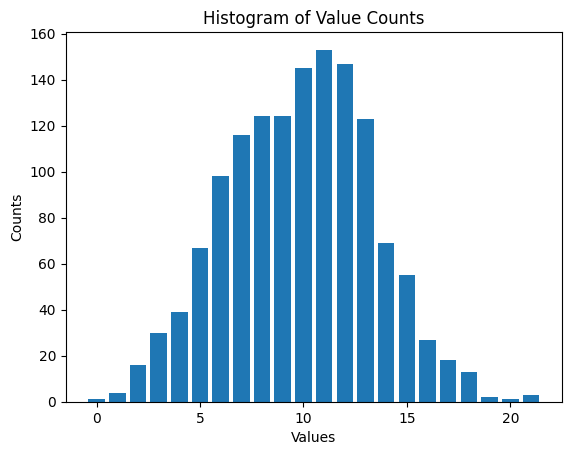

In [64]:
import matplotlib.pyplot as plt

# Dictionary mapping values to counts
data = age_counts

# Extract values and counts from the dictionary
values = list(data.keys())
counts = list(data.values())

# Create a bar plot
plt.bar(values, counts)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Histogram of Value Counts')

# Display the plot
plt.show()